In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df=df.iloc[:,2:]

In [5]:
pd.DataFrame(df)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [7]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)


StandardScaler()

In [18]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [19]:
np.round(x_train_scaled.describe(),1)

AttributeError: 'numpy.ndarray' object has no attribute 'describe'

In [20]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [21]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [22]:
np.round(x_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


In [23]:
x_train_scaled["EstimatedSalary"]


0     -1.584970
1      0.930987
2      1.220177
3      1.075582
4     -0.486047
         ...   
275   -1.151185
276   -0.775237
277   -0.514966
278   -0.457127
279    1.393691
Name: EstimatedSalary, Length: 280, dtype: float64

In [24]:
print(pd.DataFrame(x_train_scaled))


          Age  EstimatedSalary
0   -1.163172        -1.584970
1    2.170181         0.930987
2    0.013305         1.220177
3    0.209385         1.075582
4    0.405465        -0.486047
..        ...              ...
275  0.993704        -1.151185
276 -0.869053        -0.775237
277 -0.182774        -0.514966
278 -1.065133        -0.457127
279 -1.163172         1.393691

[280 rows x 2 columns]


### print(x_train_scaled['Age'].shape[1])


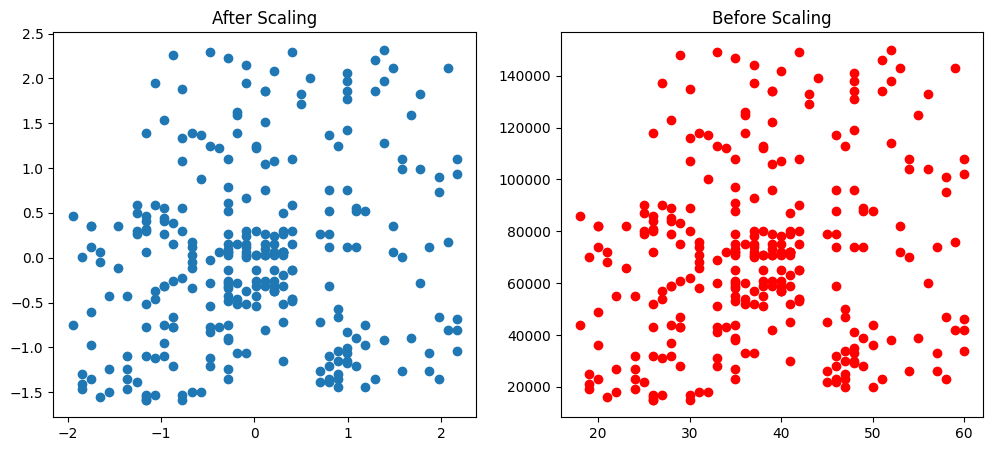

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train_scaled['Age'], x_train_scaled['EstimatedSalary'])
ax1.set_title('After Scaling')

ax2.scatter(x_train['Age'], x_train['EstimatedSalary'], color='red')
ax2.set_title('Before Scaling')

plt.show()
